## Mutation Relation Accuracy

In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
import seaborn as sns
from evaluate.simulation_metrics import *

In [3]:
results_given_cluster_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR))
results_given_k_kmeans_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR, type="KMEANS_GIVEN_K"))
results_kmeans_df = make_results_df(lambda STR : calculate_pairwise_ancestry_accuracy_for_scope(STR, type="KMEANS"))

In [4]:
results_phertilizer_df = make_results_df(calculate_pairwise_ancestry_accuracy_for_phertilizer)

In [5]:
results_kmeans_post_df = make_results_df(lambda STR: calculate_pairwise_ancestry_accuracy_for_scope_post(STR, type="KMEANS"))
results_given_k_kmeans_post_df = make_results_df(lambda STR: calculate_pairwise_ancestry_accuracy_for_scope_post(STR, type="KMEANS_GIVEN_K"))

In [6]:
results_sbmclone_df = make_results_df(calculate_pairwise_ancestry_accuracy_for_sbmclone)

In [7]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in results_given_cluster_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(results_given_cluster_df, results_given_k_kmeans_df, on=merge_on, suffixes=['_given_clusters', '_given_k_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, results_kmeans_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_kmeans', 'error': 'error_kmeans'}, inplace=True)
results_df_3 = pd.merge(results_df_2, results_phertilizer_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_4 = pd.merge(results_df_3, results_given_k_kmeans_post_df, on=merge_on, how='left')
results_df_4.rename(columns={'accuracy': 'accuracy_given_k_kmeans_post', 'error': 'error_given_k_kmeans_post'}, inplace=True)
results_df_5 = pd.merge(results_df_4, results_kmeans_post_df, on=merge_on, how='left')
results_df_5.rename(columns={'accuracy': 'accuracy_kmeans_post', 'error': 'error_kmeans_post'}, inplace=True)
results_df_6 = pd.merge(results_df_5, results_sbmclone_df, on=merge_on, how='left')
results_df_6.rename(columns={'accuracy': 'accuracy_sbmclone', 'error': 'error_sbmclone'}, inplace=True)


results_df = results_df_6

['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [8]:
results_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post,accuracy_sbmclone,error_sbmclone
0,1000,5,100,0.02,5,0,1.000000,None,0.212072,None,0.212072,None,0.470046,None,0.337140,None,0.337140,None,0.134688,None
1,1000,5,100,0.02,5,1,0.519609,None,0.476092,None,0.476092,None,0.199955,None,0.476092,None,0.476092,None,0.089625,None
2,1000,5,100,0.02,5,2,1.000000,None,0.383371,None,0.476761,None,0.418695,None,0.493112,None,0.476761,None,0.122324,None
3,1000,5,100,0.02,5,3,1.000000,None,0.656200,None,0.656200,None,0.355762,None,0.656200,None,0.656200,None,0.120941,None
4,1000,5,100,0.02,5,4,1.000000,None,0.570083,None,0.570083,None,0.353868,None,0.570083,None,0.570083,None,0.128217,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,0.975026,None,0.955746,None,0.740449,None,0.755036,None,0.978902,None,0.740449,None,0.029733,None
1211,10000,15,1000,0.10,15,1,0.962534,None,0.804437,None,0.884497,None,NaN,[Errno 2] No such file or directory: '../data/...,0.896660,None,0.966077,None,0.041811,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.797396,None,0.861144,None,0.802592,None,0.898885,None,0.973787,None,0.026294,None
1213,10000,15,1000,0.10,15,3,0.991226,None,0.905604,None,0.708512,None,0.870899,None,0.965933,None,0.708512,None,0.033479,None


In [23]:
results_df.to_csv("../outputs/simulation-results/mutation-relation-accuracy.csv")

In [24]:
common_results = results_df.dropna(
    subset=['accuracy_given_clusters', 'accuracy_given_k_kmeans', 'accuracy_kmeans', 'accuracy_phertilizer']
)
common_results.loc[:, 'accuracy_sbmclone'] = common_results['accuracy_sbmclone'].fillna(0)
common_results

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post,accuracy_sbmclone,error_sbmclone
0,1000,5,100,0.02,5,0,1.000000,None,0.212072,None,0.212072,None,0.470046,None,0.337140,None,0.337140,None,0.134688,None
1,1000,5,100,0.02,5,1,0.519609,None,0.476092,None,0.476092,None,0.199955,None,0.476092,None,0.476092,None,0.089625,None
2,1000,5,100,0.02,5,2,1.000000,None,0.383371,None,0.476761,None,0.418695,None,0.493112,None,0.476761,None,0.122324,None
3,1000,5,100,0.02,5,3,1.000000,None,0.656200,None,0.656200,None,0.355762,None,0.656200,None,0.656200,None,0.120941,None
4,1000,5,100,0.02,5,4,1.000000,None,0.570083,None,0.570083,None,0.353868,None,0.570083,None,0.570083,None,0.128217,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,0.991118,None,0.899169,None,0.715658,None,0.470841,None,0.966571,None,0.715658,None,0.035595,None
1210,10000,15,1000,0.10,15,0,0.975026,None,0.955746,None,0.740449,None,0.755036,None,0.978902,None,0.740449,None,0.029733,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.797396,None,0.861144,None,0.802592,None,0.898885,None,0.973787,None,0.026294,None
1213,10000,15,1000,0.10,15,3,0.991226,None,0.905604,None,0.708512,None,0.870899,None,0.965933,None,0.708512,None,0.033479,None


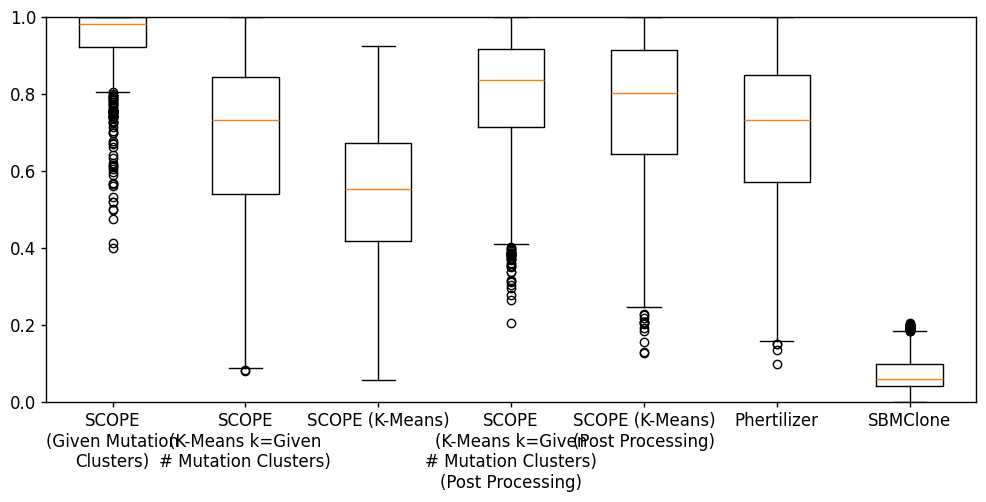

In [25]:
plt.figure(figsize=(12, 5))
plt.boxplot(
    [
        common_results['accuracy_given_clusters'], 
        common_results['accuracy_given_k_kmeans'], 
        common_results['accuracy_kmeans'],
        common_results['accuracy_given_k_kmeans_post'], 
        common_results['accuracy_kmeans_post'], 
        common_results['accuracy_phertilizer'],
        common_results['accuracy_sbmclone']
    ],
    tick_labels=[
        'SCOPE\n(Given Mutation\nClusters)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)', 
        'SCOPE (K-Means)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)\n(Post Processing)', 
        'SCOPE (K-Means)\n(Post Processing)', 
        'Phertilizer',
        'SBMClone',
    ]
)

plt.ylim(0, 1)

plt.show()

In [32]:
set2 = sns.color_palette("Set2")
custom_palette = {
    "SCOPE Given Clusters": "#00840044",     # dark green
    "SCOPE": set2[0],
    "Phertilizer": set2[1],
    "SBMClone": set2[2],
}

In [33]:
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "legend.title_fontsize": 14,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})


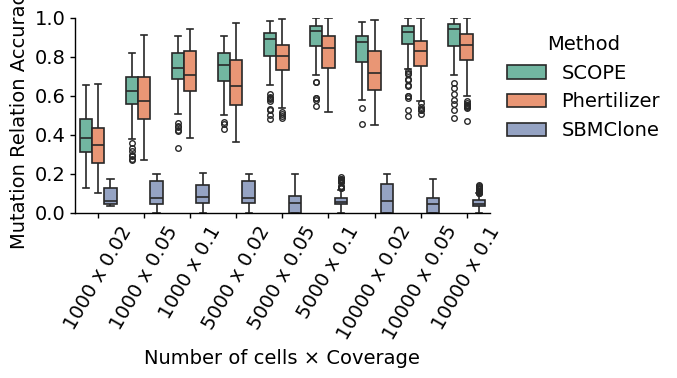

In [35]:
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})

df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

df_melted["group"] = df_melted["ncells"] + " x " + df_melted["coverage"]


fig, ax = plt.subplots(figsize=(7, 4))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("Mutation Relation Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../outputs/figures/simulation-mutation-relation-accuracy.svg")
plt.show()

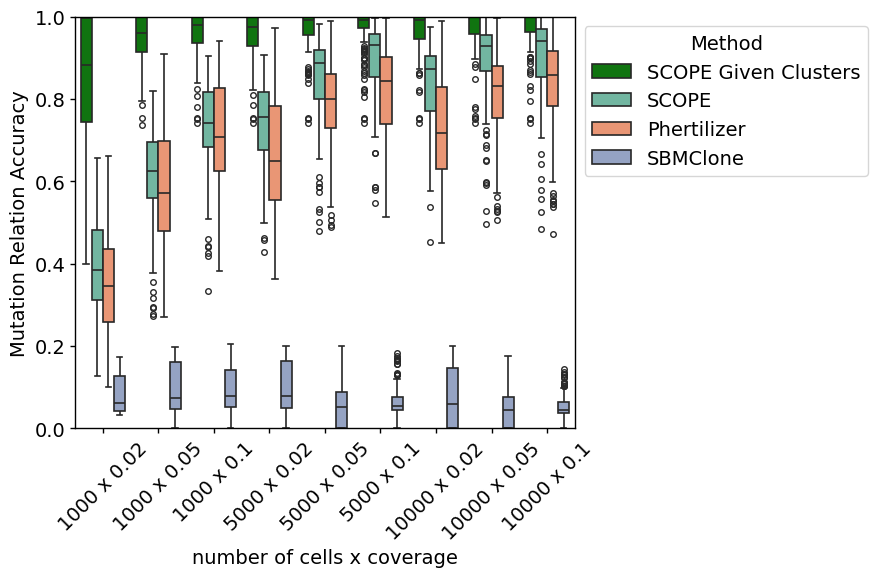

In [37]:
accuracy_cols = [
    "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})

df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

df_melted["group"] = df_melted["ncells"] + " x " + df_melted["coverage"]

plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
)

plt.xlabel("number of cells x coverage")
plt.ylabel("Mutation Relation Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()

plt.savefig("../outputs/figures/simulation-mutation-relation-accuracy-all.svg")

plt.show()

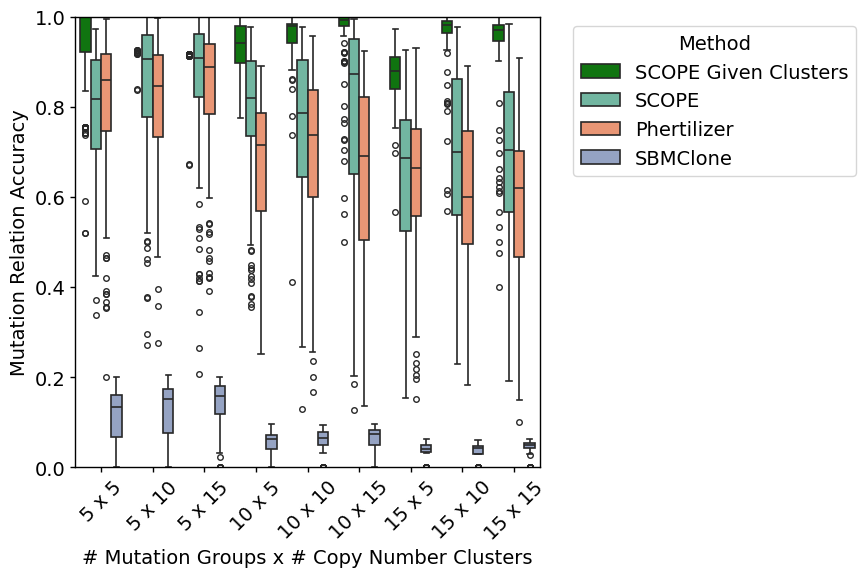

In [39]:
accuracy_cols = [
    "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

df_melted = common_results.melt(
    id_vars=["n_mutation_groups", "n_clusters"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})


df_melted["n_mutation_groups"] = df_melted["n_mutation_groups"].astype(str)
df_melted["n_clusters"] = df_melted["n_clusters"].astype(str)

df_melted["group"] = df_melted["n_mutation_groups"] + " x " + df_melted["n_clusters"]

plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
)
plt.xlabel("# Mutation Groups x # Copy Number Clusters")
plt.ylabel("Mutation Relation Accuracy")
plt.xticks(rotation=45)
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()


plt.savefig("../outputs/figures/simulation-mutation-relation-accuracy-all-2.svg")

plt.show()



## Mutation Placement Accuracy

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
results_given_cluster_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "GIVEN_CLUSTERING"))
results_given_k_kmeans_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_GIVEN_K"))
results_kmeans_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS"))
results_given_k_kmeans_post_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_GIVEN_K_POST"))
results_kmeans_post_df = make_results_df(lambda STR: cluster_placement_accuracy(STR, "KMEANS_POST"))
results_phertilizer_df = make_results_df(cluster_placement_accuracy_phertilizer)

In [45]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in results_given_cluster_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(results_given_cluster_df, results_given_k_kmeans_df, on=merge_on, suffixes=['_given_clusters', '_given_k_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, results_kmeans_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_kmeans', 'error': 'error_kmeans'}, inplace=True)
results_df_3 = pd.merge(results_df_2, results_phertilizer_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_4 = pd.merge(results_df_3, results_given_k_kmeans_post_df, on=merge_on, how='left')
results_df_4.rename(columns={'accuracy': 'accuracy_given_k_kmeans_post', 'error': 'error_given_k_kmeans_post'}, inplace=True)
results_df_5 = pd.merge(results_df_4, results_kmeans_post_df, on=merge_on, how='left')
results_df_5.rename(columns={'accuracy': 'accuracy_kmeans_post', 'error': 'error_kmeans_post'}, inplace=True)

results_df = results_df_5

['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [48]:
results_df.to_csv("../outputs/simulation-results/mutation-placement-accuracy.csv")

In [49]:
common_results = results_df.dropna(
    subset=['accuracy_given_clusters', 'accuracy_given_k_kmeans', 'accuracy_kmeans',
     'accuracy_phertilizer'
    ]
)
common_results

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_given_clusters,error_given_clusters,accuracy_given_k_kmeans,error_given_k_kmeans,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_given_k_kmeans_post,error_given_k_kmeans_post,accuracy_kmeans_post,error_kmeans_post
2,1000,5,100,0.02,5,2,0.562500,None,0.166016,None,0.603516,None,0.182813,None,0.166016,None,0.603516,None
4,1000,5,100,0.02,5,4,0.604207,None,0.663480,None,0.663480,None,0.187763,None,0.663480,None,0.663480,None
6,1000,5,100,0.02,10,1,0.000000,None,0.000000,None,0.000000,None,0.097860,None,0.000000,None,0.000000,None
8,1000,5,100,0.02,10,3,0.182365,None,0.360721,None,0.360721,None,0.091182,None,0.360721,None,0.360721,None
9,1000,5,100,0.02,10,4,0.168750,None,0.243750,None,0.243750,None,0.092292,None,0.516667,None,0.516667,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,1.000000,None,0.867630,None,0.459613,None,0.355705,None,0.902028,None,0.459613,None
1210,10000,15,1000,0.10,15,0,1.000000,None,0.980027,None,0.198739,None,0.259502,None,0.991772,None,0.198739,None
1212,10000,15,1000,0.10,15,2,1.000000,None,0.862209,None,0.932547,None,0.402458,None,0.917207,None,0.992593,None
1213,10000,15,1000,0.10,15,3,1.000000,None,0.885670,None,0.600282,None,0.370135,None,0.916387,None,0.600282,None


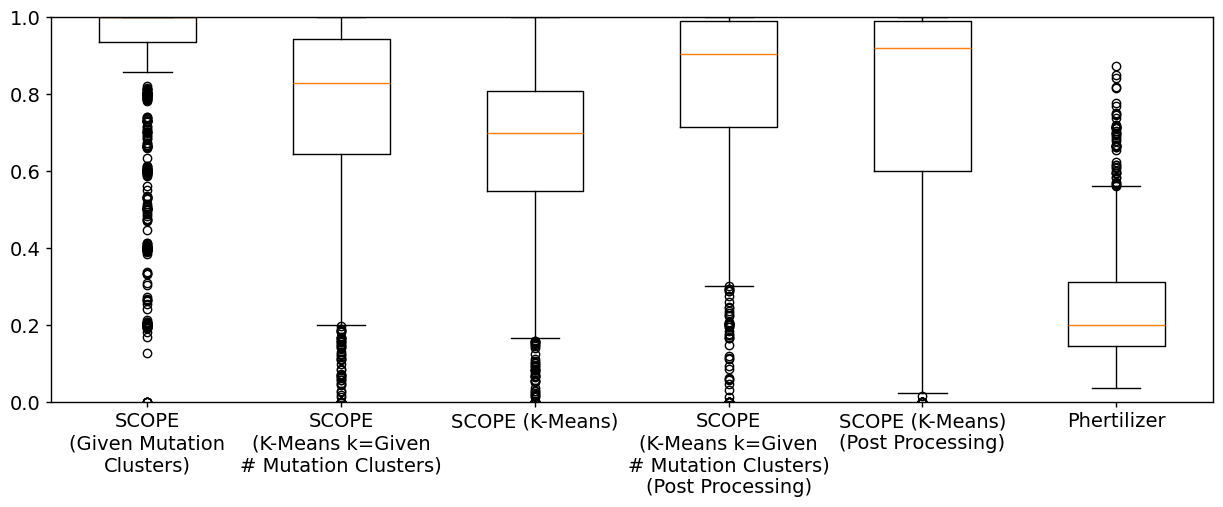

In [51]:
plt.figure(figsize=(15, 5))
plt.boxplot(
    [
        common_results['accuracy_given_clusters'], 
        common_results['accuracy_given_k_kmeans'], 
        common_results['accuracy_kmeans'],
        common_results['accuracy_given_k_kmeans_post'], 
        common_results['accuracy_kmeans_post'], 
        common_results['accuracy_phertilizer']
    ],
    tick_labels=[
        'SCOPE\n(Given Mutation\nClusters)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)', 
        'SCOPE (K-Means)', 
        'SCOPE\n(K-Means k=Given\n# Mutation Clusters)\n(Post Processing)', 
        'SCOPE (K-Means)\n(Post Processing)', 
        'Phertilizer'
    ]
)

plt.ylim(0, 1)

plt.show()

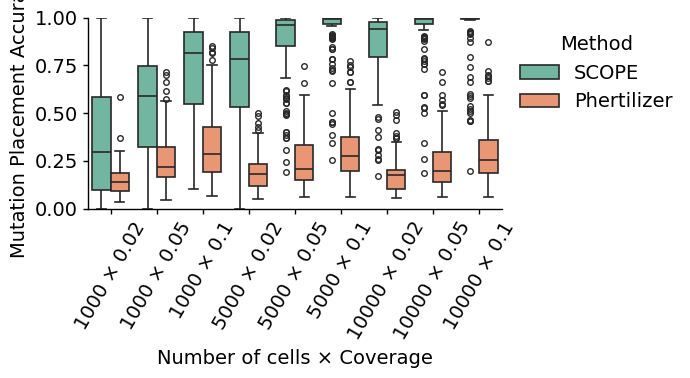

In [54]:
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer"
]

df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    # "accuracy_given_clusters": "SCOPE Given Clusters",
    # "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    # "accuracy_kmeans": "SCOPE (k-means)",
    # "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer"
})

df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)
df_melted["group"] = df_melted["ncells"] + " × " + df_melted["coverage"]


fig, ax = plt.subplots(figsize=(7, 4))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("Mutation Placement Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../outputs/figures/simulation-mutation-placement-accuracy.svg")
plt.show()


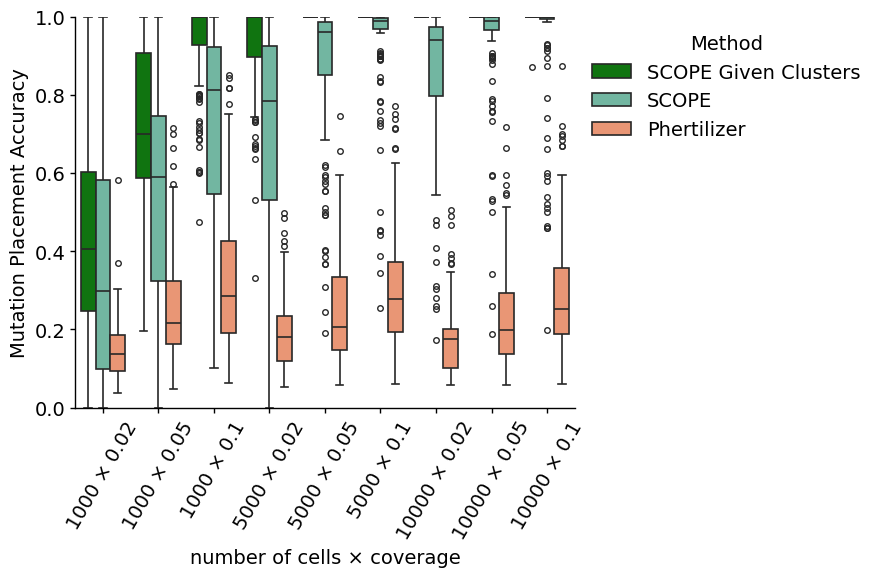

In [55]:
accuracy_cols = [
    "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer"
]

df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    # "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    # "accuracy_kmeans": "SCOPE (k-means)",
    # "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer"
})

df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)
df_melted["group"] = df_melted["ncells"] + " × " + df_melted["coverage"]

fig, ax = plt.subplots(figsize=(9, 6))

# Create boxplot
sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

# Nature-style formatting
ax.set_xlabel("number of cells × coverage")
ax.set_ylabel("Mutation Placement Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../outputs/figures/simulation-mutation-placement-accuracy-all.svg")
plt.show()

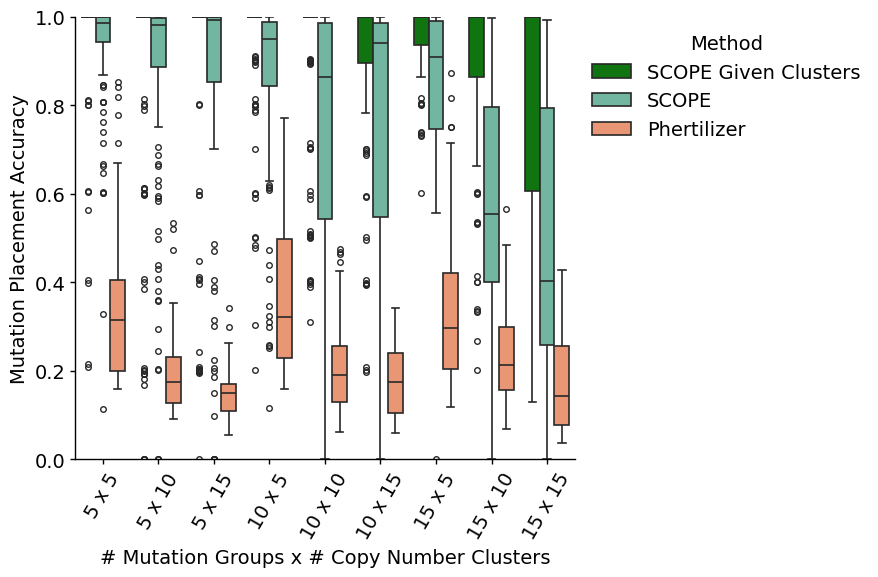

In [57]:
accuracy_cols = [
    "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_kmeans_post",
    "accuracy_phertilizer",
    # "accuracy_sbmclone"
]

df_melted = common_results.melt(
    id_vars=["n_mutation_groups", "n_clusters"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_given_clusters": "SCOPE Given Clusters",
    "accuracy_given_k_kmeans": "SCOPE Given k (k-means)",
    "accuracy_kmeans": "SCOPE (k-means)",
    "accuracy_given_k_kmeans_post": "SCOPE Given k (k-means) (post processing)",
    # "accuracy_kmeans_post": "SCOPE (k-means) (post processing)",
    "accuracy_kmeans_post": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})


df_melted["n_mutation_groups"] = df_melted["n_mutation_groups"].astype(str)
df_melted["n_clusters"] = df_melted["n_clusters"].astype(str)

df_melted["group"] = df_melted["n_mutation_groups"] + " x " + df_melted["n_clusters"]

fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)


ax.set_xlabel("# Mutation Groups x # Copy Number Clusters")
ax.set_ylabel("Mutation Placement Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../outputs/figures/simulation-mutation-placement-accuracy-all-2.svg")
plt.show()

## Runtime

In [62]:
runtime_scope_df = make_results_df(lambda STR: calculate_runtime(STR, "SCOPE"))
runtime_kmeans_df = make_results_df(lambda STR: calculate_runtime(STR, "KMEANS"))
runtime_phertilizer_df = make_results_df(lambda STR: calculate_runtime(STR, "PHERTILIZER"))
runtime_sbmclone_df = make_results_df(lambda STR: calculate_runtime(STR, "SBMCLONE"))

In [66]:
exclude_cols = ['accuracy', 'error']

merge_on = [col for col in runtime_scope_df.columns if col not in exclude_cols]
print(merge_on)

results_df_1 = pd.merge(runtime_scope_df, runtime_kmeans_df, on=merge_on, suffixes=['_scope', '_kmeans'], how='left')
results_df_2 = pd.merge(results_df_1, runtime_phertilizer_df, on=merge_on, how='left')
results_df_2.rename(columns={'accuracy': 'accuracy_phertilizer', 'error': 'error_phertilizer'}, inplace=True)
results_df_3 = pd.merge(results_df_2, runtime_sbmclone_df, on=merge_on, how='left')
results_df_3.rename(columns={'accuracy': 'accuracy_sbmclone', 'error': 'error_sbmclone'}, inplace=True)

results_df = results_df_3
results_df['accuracy_scope_all'] = results_df['accuracy_scope'] + results_df['accuracy_kmeans']


['ncells', 'n_mutation_groups', 'mutation_group_size', 'coverage', 'n_clusters', 'seed']


In [ ]:
results_df.to_csv("../outputs/simulation-results/runtime.csv")
results_df

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_scope,error_scope,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_sbmclone,error_sbmclone,accuracy_scope_all
0,1000,5,100,0.02,5,0,18.3496,None,21.7705,None,26.7949,None,3.5990,None,40.1201
1,1000,5,100,0.02,5,1,13.9885,None,24.5724,None,56.8126,None,1.9573,None,38.5609
2,1000,5,100,0.02,5,2,8.2163,None,5.8560,None,58.7336,None,2.2560,None,14.0723
3,1000,5,100,0.02,5,3,19.7780,None,10.4220,None,22.4319,None,3.1668,None,30.2000
4,1000,5,100,0.02,5,4,44.1788,None,8.7348,None,28.1503,None,2.2157,None,52.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10000,15,1000,0.10,15,0,20.8925,None,134.7258,None,17218.6400,None,7314.2527,None,155.6183
1211,10000,15,1000,0.10,15,1,1162.9407,None,172.2672,None,NaN,[Errno 2] No such file or directory: '../data/...,486.1717,None,1335.2079
1212,10000,15,1000,0.10,15,2,577.7809,None,139.2696,None,16545.7071,None,2384.6853,None,717.0505
1213,10000,15,1000,0.10,15,3,25.2844,None,136.4491,None,26080.4858,None,5093.3908,None,161.7335


In [68]:
common_results = results_df.dropna(
    subset=['accuracy_scope', 'accuracy_phertilizer', 'accuracy_kmeans', 'accuracy_sbmclone']
)
common_results

,ncells,n_mutation_groups,mutation_group_size,coverage,n_clusters,seed,accuracy_scope,error_scope,accuracy_kmeans,error_kmeans,accuracy_phertilizer,error_phertilizer,accuracy_sbmclone,error_sbmclone,accuracy_scope_all
0,1000,5,100,0.02,5,0,18.3496,None,21.7705,None,26.7949,None,3.5990,None,40.1201
1,1000,5,100,0.02,5,1,13.9885,None,24.5724,None,56.8126,None,1.9573,None,38.5609
2,1000,5,100,0.02,5,2,8.2163,None,5.8560,None,58.7336,None,2.2560,None,14.0723
3,1000,5,100,0.02,5,3,19.7780,None,10.4220,None,22.4319,None,3.1668,None,30.2000
4,1000,5,100,0.02,5,4,44.1788,None,8.7348,None,28.1503,None,2.2157,None,52.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,10000,15,1000,0.10,10,3,19.4463,None,152.8893,None,11292.0355,None,8196.0581,None,172.3356
1210,10000,15,1000,0.10,15,0,20.8925,None,134.7258,None,17218.6400,None,7314.2527,None,155.6183
1212,10000,15,1000,0.10,15,2,577.7809,None,139.2696,None,16545.7071,None,2384.6853,None,717.0505
1213,10000,15,1000,0.10,15,3,25.2844,None,136.4491,None,26080.4858,None,5093.3908,None,161.7335


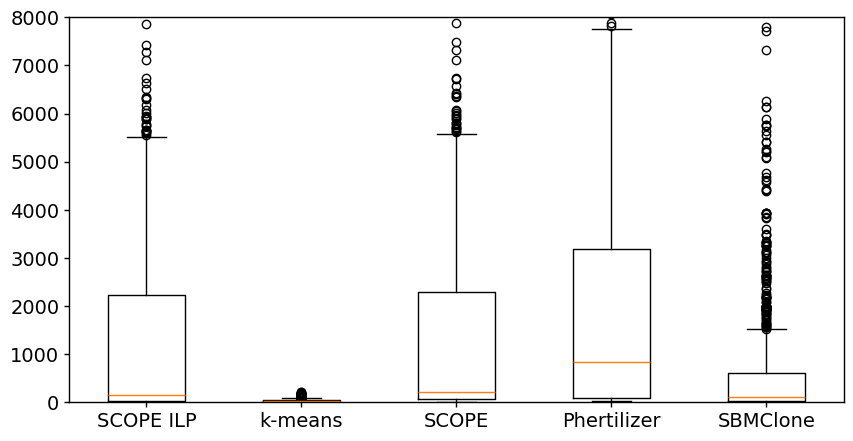

In [69]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [
        common_results['accuracy_scope'], 
        common_results['accuracy_kmeans'], 
        common_results['accuracy_scope_all'], 
        common_results['accuracy_phertilizer'],
        common_results['accuracy_sbmclone'], 
    ],
    tick_labels=[
        'SCOPE ILP', 
        'k-means', 
        'SCOPE',
        'Phertilizer', 
        'SBMClone', 
    ]
)

plt.ylim(0, 8000)

plt.show()

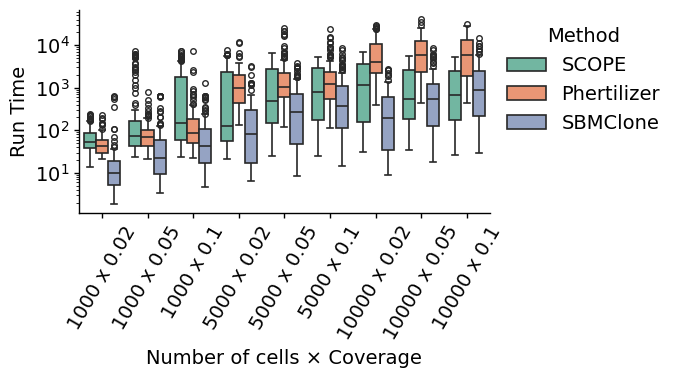

In [71]:
accuracy_cols = [
    # "accuracy_given_clusters",
    # "accuracy_given_k_kmeans",
    # "accuracy_kmeans",
    # "accuracy_given_k_kmeans_post",
    "accuracy_scope_all",
    "accuracy_phertilizer",
    "accuracy_sbmclone"
]

df_melted = common_results.melt(
    id_vars=["ncells", "coverage"],
    value_vars=accuracy_cols,
    var_name="method",
    value_name="accuracy"
)

df_melted["method"] = df_melted["method"].replace({
    "accuracy_scope_all": "SCOPE",
    "accuracy_phertilizer": "Phertilizer",
    "accuracy_sbmclone": "SBMClone"
})

df_melted["ncells"] = df_melted["ncells"].astype(str)
df_melted["coverage"] = df_melted["coverage"].astype(str)

df_melted["group"] = df_melted["ncells"] + " x " + df_melted["coverage"]

fig, ax = plt.subplots(figsize=(7, 4))

sns.boxplot(
    data=df_melted,
    x="group",
    y="accuracy",
    hue="method",
    palette=custom_palette,
    linewidth=1.2,  # thin box borders
    fliersize=4,  # small outlier points
    ax=ax
)

ax.set_yscale("log")

ax.set_xlabel("Number of cells × Coverage")
ax.set_ylabel("Run Time")
# ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title="Method", frameon=False, loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig("../outputs/figures/simulation-runtime.svg")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Example method names (replace with df_melted["method"].unique() in real use)
methods = df_melted["method"].unique()

# Same Set2 palette
palette = sns.color_palette("Set2", n_colors=len(methods))

# Create a horizontal legend-only figure
fig, ax = plt.subplots(figsize=(7, 1))
ax.axis("off")  # no axes

# Create legend handles: filled boxes with black borders
handles = [
    Patch(facecolor=color, edgecolor="black", linewidth=1.2)
    for color in palette
]

# Build legend
legend = ax.legend(
    handles,
    methods,
    title="Method",
    frameon=True,
    loc="center",
    ncol=len(methods),
    bbox_to_anchor=(0.5, 0.5),
    fontsize=16,
    title_fontsize=16
)

# Add border around the entire legend box
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(1.2)

plt.tight_layout()

plt.savefig("../outputs/figures/simulation-legend.svg")

plt.show()
